In [228]:
import pandas as pd
import numpy as np

In [229]:
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']
use=list(np.arange(len(col)))
air=pd.read_excel('/AirQualityUCI.xlsx',header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-200,usecols=use)
air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [230]:
air.tail()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [231]:
air.dtypes

DATE            datetime64[ns]
TIME                    object
CO_GT                  float64
PT08_S1_CO             float64
NMHC_GT                  int64
C6H6_GT                float64
PT08_S2_NMHC           float64
NOX_GT                 float64
PT08_S3_NOX            float64
NO2_GT                 float64
PT08_S4_NO2            float64
PT08_S5_O3             float64
T                      float64
RH                     float64
AH                     float64
dtype: object

In [232]:
print("count of null values",air.shape[0]-air.count())

count of null values DATE               0
TIME               0
CO_GT           1683
PT08_S1_CO       366
NMHC_GT            0
C6H6_GT          366
PT08_S2_NMHC     366
NOX_GT          1639
PT08_S3_NOX      366
NO2_GT          1642
PT08_S4_NO2      366
PT08_S5_O3       366
T                366
RH               366
AH               366
dtype: int64


In [233]:
air.dropna(how='all',inplace=True)
air.dropna(thresh=10,axis=0,inplace=True)

In [234]:
print("count of null values",air.shape[0]-air.count())

count of null values DATE               0
TIME               0
CO_GT           1647
PT08_S1_CO         0
NMHC_GT            0
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
dtype: int64


In [235]:
air['CO_GT']=air['CO_GT'].fillna(air['CO_GT'].mean())
air['NOX_GT']=air['NOX_GT'].fillna(air['NOX_GT'].mean())
air['NO2_GT']=air['NO2_GT'].fillna(air['NO2_GT'].mean())

In [236]:
print("count of null values",air.shape[0]-air.count())

count of null values DATE            0
TIME            0
CO_GT           0
PT08_S1_CO      0
NMHC_GT         0
C6H6_GT         0
PT08_S2_NMHC    0
NOX_GT          0
PT08_S3_NOX     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
dtype: int64


In [237]:
air.dtypes

DATE            datetime64[ns]
TIME                    object
CO_GT                  float64
PT08_S1_CO             float64
NMHC_GT                  int64
C6H6_GT                float64
PT08_S2_NMHC           float64
NOX_GT                 float64
PT08_S3_NOX            float64
NO2_GT                 float64
PT08_S4_NO2            float64
PT08_S5_O3             float64
T                      float64
RH                     float64
AH                     float64
dtype: object

In [238]:
air['DATE']=pd.to_datetime(air.DATE, format='%m/%d/%Y') 
air.set_index('DATE',inplace=True)

In [239]:
air.head()

,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
DATE,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [240]:
air['MONTH']=air.index.month  
air.reset_index(inplace=True)

In [241]:
air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,3
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,3
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,3
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,3
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,3


In [242]:
air.dtypes

DATE            datetime64[ns]
TIME                    object
CO_GT                  float64
PT08_S1_CO             float64
NMHC_GT                  int64
C6H6_GT                float64
PT08_S2_NMHC           float64
NOX_GT                 float64
PT08_S3_NOX            float64
NO2_GT                 float64
PT08_S4_NO2            float64
PT08_S5_O3             float64
T                      float64
RH                     float64
AH                     float64
MONTH                    int64
dtype: object

In [243]:
air=air.drop(['DATE'], axis=1)

In [244]:
air['TIME']=air['TIME'].astype(str)

In [245]:
air.dtypes

TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
MONTH             int64
dtype: object

In [246]:
air['HOUR']=air['TIME'].apply(lambda x: int(x.split(':')[0]))

In [247]:
air.dtypes

TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT           int64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
MONTH             int64
HOUR              int64
dtype: object

In [248]:
air=air.drop(['TIME'],axis=1)

In [249]:
air.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH,HOUR
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,3,18
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,3,19
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,3,20
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,3,21
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,3,22


In [250]:
import seaborn as sns

In [251]:
air.corr()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,MONTH,HOUR
CO_GT,1.000000,0.800535,0.172815,0.840522,0.823205,0.752817,-0.635327,0.636184,0.576814,0.785708,0.020054,0.044534,0.043456,0.097419,0.324816
PT08_S1_CO,0.800535,1.000000,0.250615,0.883821,0.892972,0.650745,-0.771918,0.585090,0.682874,0.899326,0.048628,0.114607,0.135323,-0.040334,0.328029
NMHC_GT,0.172815,0.250615,1.000000,0.136738,0.134304,-0.105073,0.052205,-0.011023,0.213857,0.111535,-0.068126,-0.014300,-0.123689,-0.235520,0.050742
C6H6_GT,0.840522,0.883821,0.136738,1.000000,0.981962,0.651315,-0.735711,0.556928,0.765717,0.865727,0.198891,-0.061643,0.167909,0.128530,0.344149
PT08_S2_NMHC,0.823205,0.892972,0.134304,0.981962,1.000000,0.635538,-0.796687,0.583212,0.777235,0.880590,0.241330,-0.090352,0.186906,0.128228,0.389194
NOX_GT,0.752817,0.650745,-0.105073,0.651315,0.635538,1.000000,-0.594868,0.758092,0.216490,0.726941,-0.249329,0.202527,-0.135322,0.122708,0.202336
PT08_S3_NOX,-0.635327,-0.771918,0.052205,-0.735711,-0.796687,-0.594868,1.000000,-0.591619,-0.538460,-0.796554,-0.145133,-0.056730,-0.232021,-0.061556,-0.323662
NO2_GT,0.636184,0.585090,-0.011023,0.556928,0.583212,0.758092,-0.591619,1.000000,0.145994,0.654161,-0.172225,-0.084141,-0.303472,-0.160575,0.332012
PT08_S4_NO2,0.576814,0.682874,0.213857,0.765717,0.777235,0.216490,-0.538460,0.145994,1.000000,0.591137,0.561333,-0.032188,0.629644,0.176305,0.221248
PT08_S5_O3,0.785708,0.899326,0.111535,0.865727,0.880590,0.726941,-0.796554,0.654161,0.591137,1.000000,-0.027193,0.124952,0.070738,0.049023,0.245066


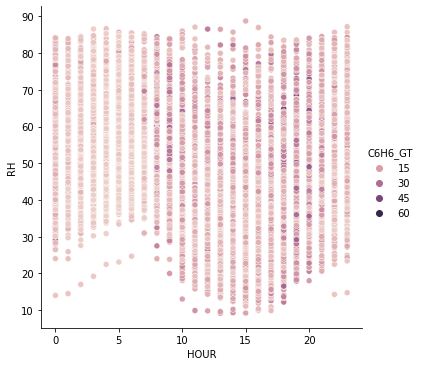

In [252]:
sns.relplot(y='RH',x='HOUR',data=air,hue='C6H6_GT')

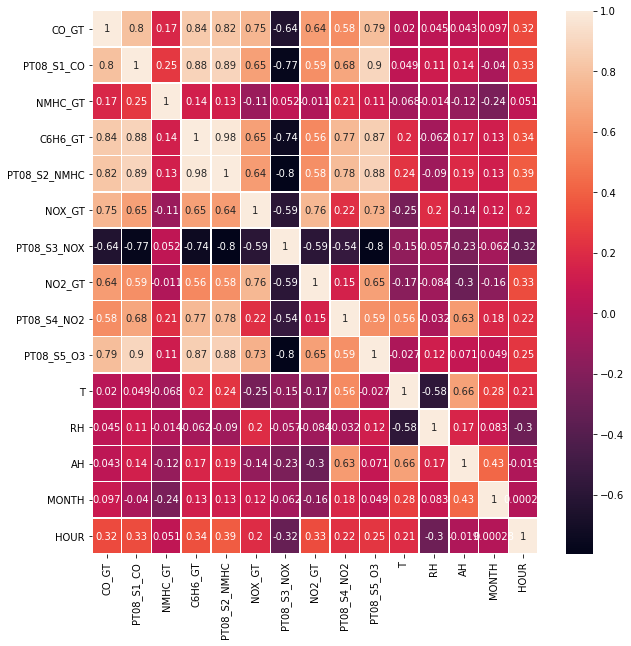

In [253]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(air.corr(), annot=True, linewidths=.5, ax=ax)

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
from sklearn.ensemble import RandomForestRegressor

In [256]:
X=air.drop(['RH'],axis=1)
y=air[['RH']]

In [257]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [258]:
rf=RandomForestRegressor()

In [259]:
rf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [260]:
rf.score(x_test,y_test) #Accuracy like these shows overfitting dont ever consider it as right before trying out with more data if available

0.9986357245960741

In [262]:
from sklearn.tree import DecisionTreeRegressor

In [271]:
pr=DecisionTreeRegressor(max_depth=6)

In [272]:
pr.fit(x_train,y_train)
pr.score(x_test,y_test)

0.9248409152462638

# New Section

# New Section